In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('heartdisease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']].mode()

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
0,1.0,0.0,0.0,240.0,22.19,75.0,75.0
1,NaN,NaN,NaN,NaN,22.54,NaN,NaN
2,NaN,NaN,NaN,NaN,22.91,NaN,NaN
3,NaN,NaN,NaN,NaN,23.48,NaN,NaN


In [10]:
df.replace('NA', np.nan, inplace=True)
df.replace('nan', np.nan, inplace=True)
df.replace('NaN', np.nan, inplace=True)

In [11]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['education'].replace(np.nan, 1.0, inplace=True)
df['BPMeds'].replace(np.nan, 0, inplace=True)
df['BMI'].replace(np.nan, 22.19, inplace=True)

C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\1799692441.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace(np.nan, 1.0, inplace=True)
C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\1799692441.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [12]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
#df['glucose'].unique()

In [14]:
df['education'] = df['education'].astype(int)
df['cigsPerDay'] = df['cigsPerDay'].round().astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)
df['totChol'] = df['totChol'].round().astype(int)
df['heartRate'] = df['heartRate'].round().astype(int)
df['glucose'] = df['glucose'].round().astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int32  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   int32  
 5   BPMeds           4238 non-null   int32  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   int32  
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   int32  
 14  glucose          4238 non-null   int32  
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(3), int32(6), int64(7)
memory usage: 430.6 KB


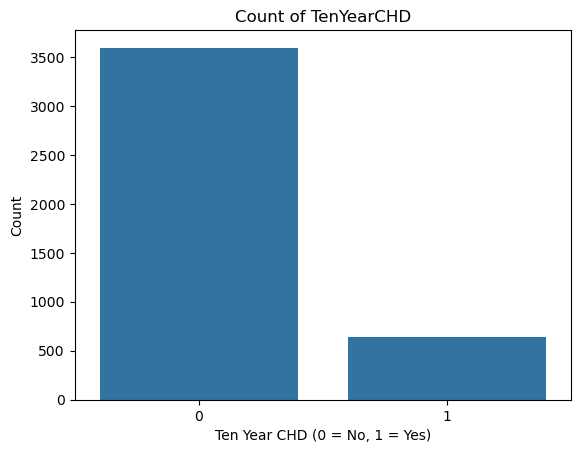

In [16]:
sns.countplot(data=df, x='TenYearCHD')
plt.title('Count of TenYearCHD')
plt.xlabel('Ten Year CHD (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

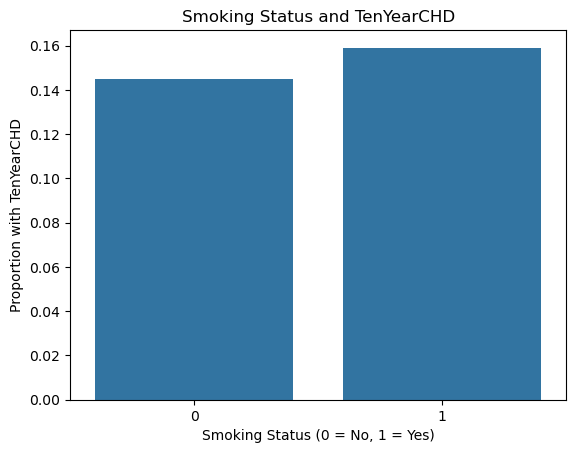

In [17]:
df_chdcomparisonbygroup = df.copy()
smoking_rate=df_chdcomparisonbygroup.groupby('currentSmoker')['TenYearCHD'].mean().reset_index()
smoking_rate.columns=['currentSmoker', 'CHD_Rate']

sns.barplot(data=smoking_rate, x='currentSmoker', y='CHD_Rate')
plt.title('Smoking Status and TenYearCHD')
plt.xlabel('Smoking Status (0 = No, 1 = Yes)')
plt.ylabel('Proportion with TenYearCHD')
plt.show()


C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\2229759097.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cigs_rate=df_chdcomparisonbygroup.groupby('cigsPerDay_binned')['TenYearCHD'].mean().reset_index()


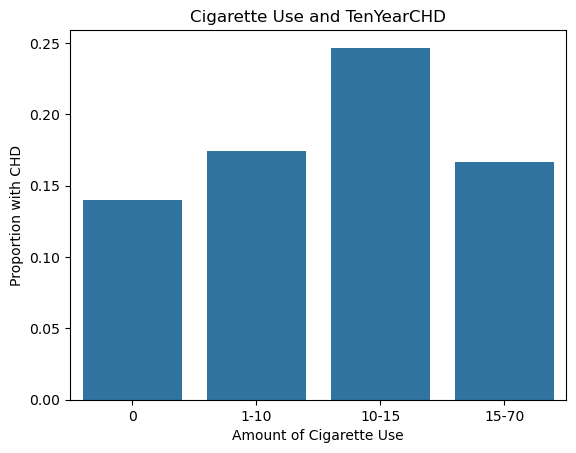

In [18]:
df_chdcomparisonbygroup = df.copy()
bins=np.linspace(min(df_chdcomparisonbygroup['cigsPerDay']), max(df_chdcomparisonbygroup['cigsPerDay']), 5)
group_names=['0', '1-10', '10-15', '15-70']
df_chdcomparisonbygroup.loc[:, 'cigsPerDay_binned'] = pd.cut(df_chdcomparisonbygroup['cigsPerDay'],bins=bins,labels=group_names,include_lowest=True)
cigs_rate=df_chdcomparisonbygroup.groupby('cigsPerDay_binned')['TenYearCHD'].mean().reset_index()
cigs_rate.columns=['cigsPerDay_binned', 'CHD_rate']

sns.barplot(data=cigs_rate, x='cigsPerDay_binned', y='CHD_rate')
plt.title('Cigarette Use and TenYearCHD')
plt.xlabel('Amount of Cigarette Use')
plt.ylabel('Proportion with CHD')
plt.show()

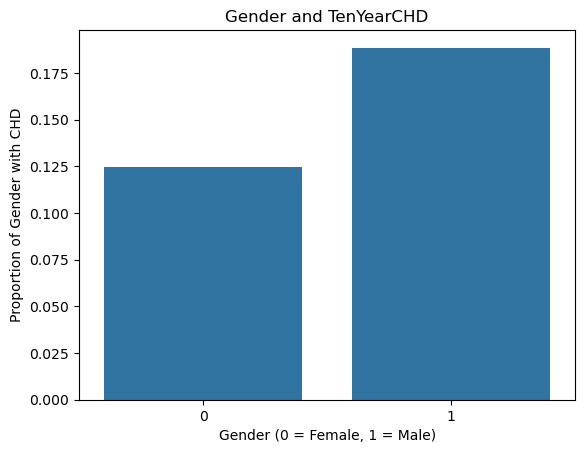

In [19]:
df_chdcomparisonbygroup = df.copy()
gender_rate=df_chdcomparisonbygroup.groupby('male')['TenYearCHD'].mean().reset_index()
gender_rate.columns=['male', 'CHD_rate']

sns.barplot(data=gender_rate, x='male', y='CHD_rate')
plt.title('Gender and TenYearCHD')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Proportion of Gender with CHD')
plt.show()

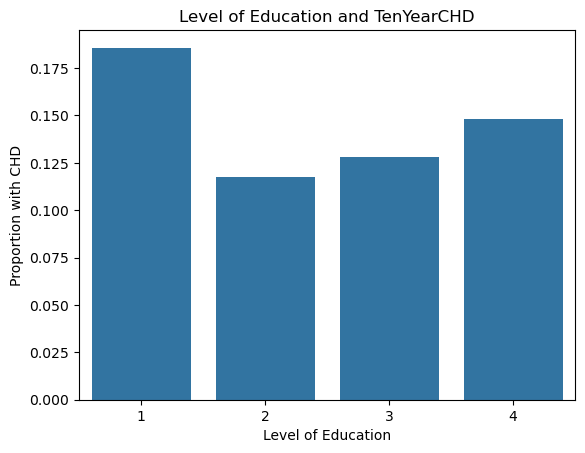

In [20]:
df_chdcomparisonbygroup = df.copy()
education_rate=df_chdcomparisonbygroup.groupby('education')['TenYearCHD'].mean().reset_index()
education_rate.columns=['education', 'CHD_rate']

sns.barplot(data=education_rate, x='education', y='CHD_rate')
plt.title('Level of Education and TenYearCHD')
plt.xlabel('Level of Education')
plt.ylabel('Proportion with CHD')
plt.show()

C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\3407228802.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('Gender', labels=['Male', 'Female'])


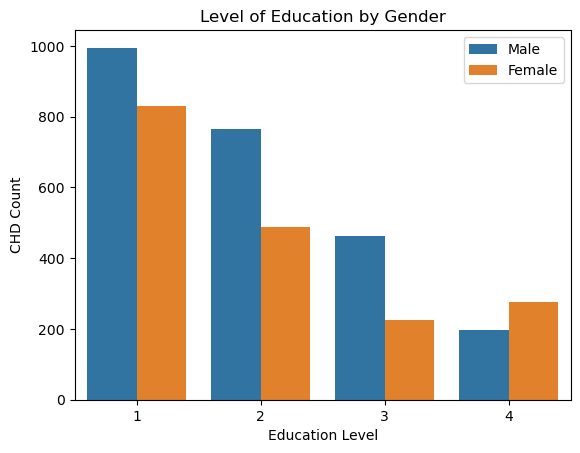

In [21]:
sns.countplot(data=df, x='education', hue='male')
plt.title('Level of Education by Gender')
plt.xlabel('Education Level')
plt.ylabel('CHD Count')
plt.legend('Gender', labels=['Male', 'Female'])
plt.show()

C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\2898245593.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  BMI_rate=df_chdcomparisonbygroup.groupby('BMI_binned')['TenYearCHD'].mean().reset_index()


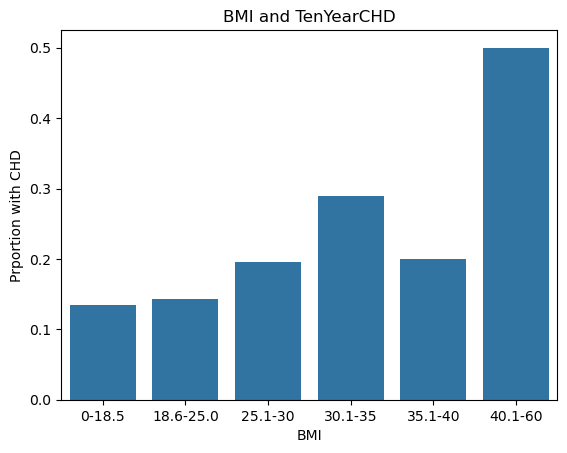

In [22]:
df_chdcomparisonbygroup = df.copy()
bins=np.linspace(min(df_chdcomparisonbygroup['BMI']), max(df_chdcomparisonbygroup['BMI']), 7)
group_names=['0-18.5', '18.6-25.0', '25.1-30', '30.1-35', '35.1-40', '40.1-60']
df_chdcomparisonbygroup.loc[:, 'BMI_binned'] = pd.cut(df_chdcomparisonbygroup['BMI'],bins=bins,labels=group_names,include_lowest=True)

BMI_rate=df_chdcomparisonbygroup.groupby('BMI_binned')['TenYearCHD'].mean().reset_index()
BMI_rate.columns=['BMI_binned', 'CHD_rate']

sns.barplot(data=BMI_rate, x='BMI_binned', y='CHD_rate')
plt.title('BMI and TenYearCHD')
plt.xlabel('BMI')
plt.ylabel('Prportion with CHD')
plt.show()


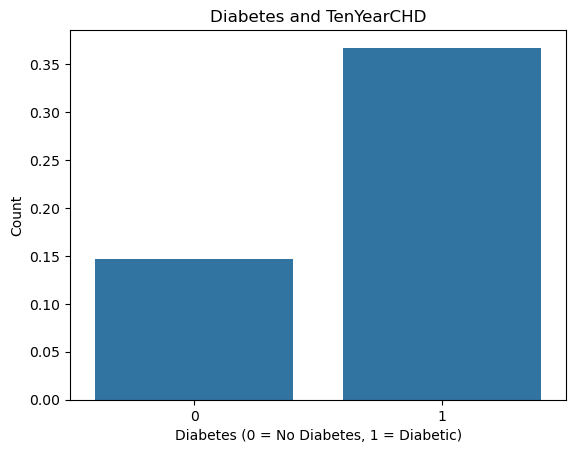

In [23]:
df_chdcomparisonbygroup = df.copy()
diabetes_rate=df_chdcomparisonbygroup.groupby('diabetes')['TenYearCHD'].mean().reset_index()
diabetes_rate.columns=['Diabetes', 'CHD_Rate']
sns.barplot(data=diabetes_rate, x='Diabetes', y='CHD_Rate')
plt.title('Diabetes and TenYearCHD')
plt.xlabel('Diabetes (0 = No Diabetes, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\3346082708.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_rate=df_chdcomparisonbygroup.groupby('glucose_binned')['TenYearCHD'].mean().reset_index()


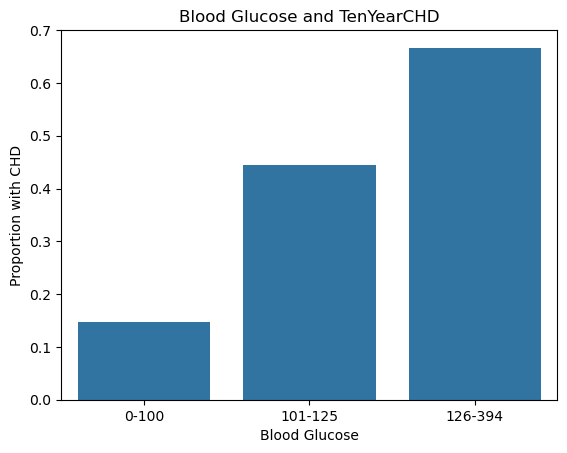

In [24]:
df_chdcomparisonbygroup = df.copy()
bins=np.linspace(min(df_chdcomparisonbygroup['glucose']), max(df_chdcomparisonbygroup['glucose']), 4)
group_names=['0-100', '101-125', '126-394']
df_chdcomparisonbygroup.loc[:, 'glucose_binned'] = pd.cut(df_chdcomparisonbygroup['glucose'],bins=bins,labels=group_names,include_lowest=True)

glucose_rate=df_chdcomparisonbygroup.groupby('glucose_binned')['TenYearCHD'].mean().reset_index()
glucose_rate.columns=['glucose_binned', 'TenYearCHD_rate']

sns.barplot(data=glucose_rate, x='glucose_binned', y='TenYearCHD_rate')
plt.title('Blood Glucose and TenYearCHD')
plt.xlabel('Blood Glucose')
plt.ylabel('Proportion with CHD')
plt.show()

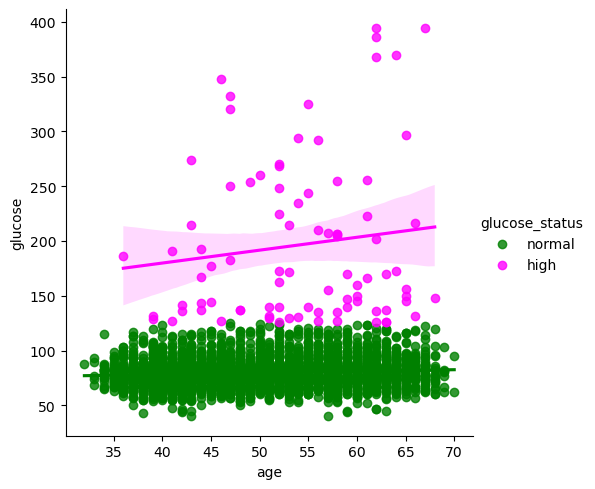

In [25]:
df_chdcomparisonbygroup = df.copy()
df_chdcomparisonbygroup['glucose_status'] = df_chdcomparisonbygroup['glucose'].apply(lambda x: 'high' if x > 125 else 'normal')
sns.lmplot(data=df_chdcomparisonbygroup,x='age',y='glucose',hue='glucose_status',palette={'high': 'magenta', 'normal': 'green'})
plt.show()

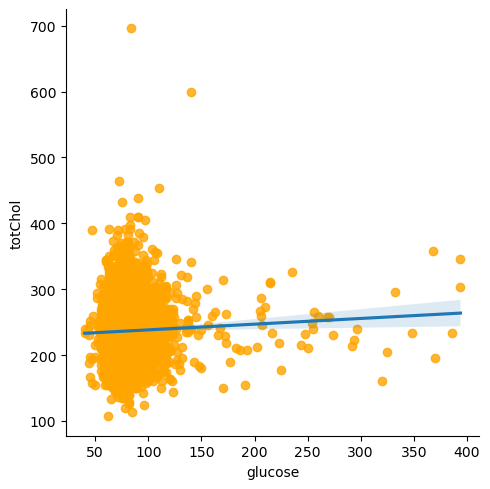

In [26]:
sns.lmplot(data=df, x='glucose', y='totChol', scatter_kws={'color':'orange'})
plt.show()

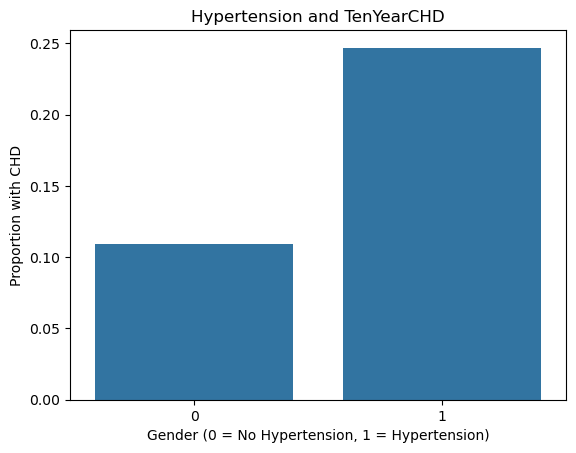

In [27]:
df_chdcomparisonbygroup = df.copy()
Hypertension_rate=df_chdcomparisonbygroup.groupby('prevalentHyp')['TenYearCHD'].mean().reset_index()
Hypertension_rate.columns=['prevalentHyp', 'TenYearCHD_rate']

sns.barplot(data=Hypertension_rate, x='prevalentHyp', y='TenYearCHD_rate')
plt.title('Hypertension and TenYearCHD')
plt.xlabel('Gender (0 = No Hypertension, 1 = Hypertension)')
plt.ylabel('Proportion with CHD')
plt.show()

C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\1153267575.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Cholesterol_rate=df_chdcomparisonbygroup.groupby('totChol_binned')['TenYearCHD'].mean().reset_index()


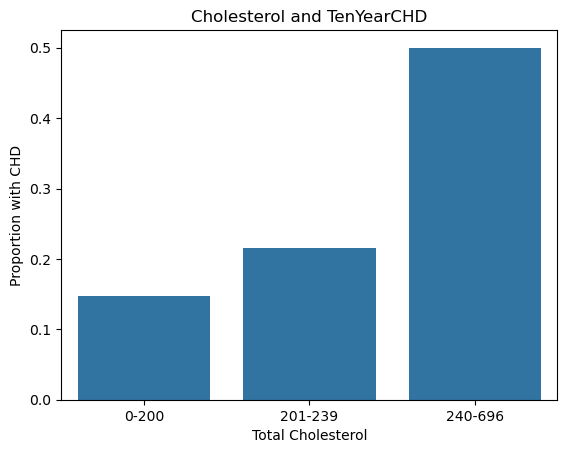

In [28]:
df_chdcomparisonbygroup = df.copy()
bins=np.linspace(min(df_chdcomparisonbygroup['totChol']), max(df_chdcomparisonbygroup['totChol']), 4)
group_names=['0-200', '201-239', '240-696']
df_chdcomparisonbygroup.loc[:, 'totChol_binned'] = pd.cut(df_chdcomparisonbygroup['totChol'],bins=bins,labels=group_names,include_lowest=True)

Cholesterol_rate=df_chdcomparisonbygroup.groupby('totChol_binned')['TenYearCHD'].mean().reset_index()
Cholesterol_rate.columns=['totChol_binned', 'TenYearCHD_rate']

sns.barplot(data=Cholesterol_rate, x='totChol_binned', y='TenYearCHD_rate')
plt.title('Cholesterol and TenYearCHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Proportion with CHD')
plt.show()

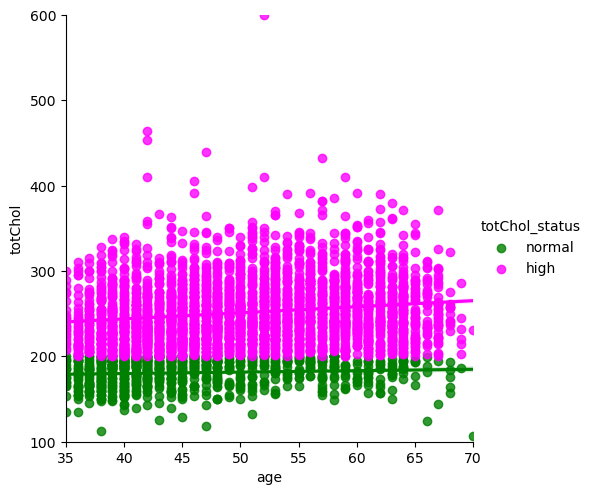

In [29]:
df_chdcomparisonbygroup = df.copy()
df_chdcomparisonbygroup['totChol'] = pd.to_numeric(df_chdcomparisonbygroup['totChol'], errors='coerce')
df_chdcomparisonbygroup['totChol_status']=df_chdcomparisonbygroup['totChol'].apply(lambda x: 'high' if x>200 else 'normal')
sns.lmplot(data=df_chdcomparisonbygroup, x='age', y='totChol', hue='totChol_status', palette={'high': 'magenta', 'normal':'green'})
plt.xlim(35,70)
plt.ylim(100, 600)
plt.show()

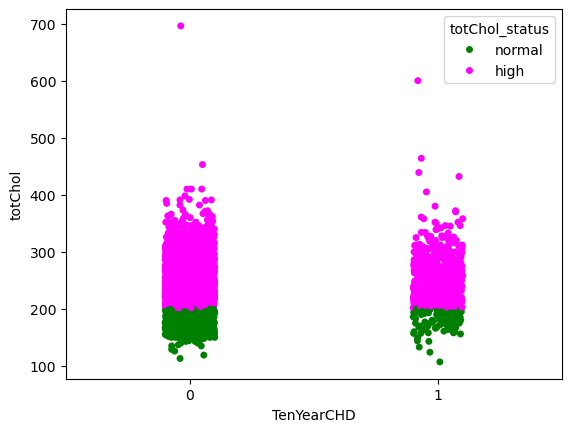

In [30]:
df_chdcomparisonbygroup = df.copy()
df_chdcomparisonbygroup['totChol_status']=df_chdcomparisonbygroup['totChol'].apply(lambda x: 'high' if x>200 else 'normal')

sns.stripplot(data=df_chdcomparisonbygroup, x='TenYearCHD', y='totChol', hue='totChol_status', palette={'high': 'magenta', 'normal':'green'}, jitter=True)
plt.show()

C:\Users\cecil\AppData\Local\Temp\ipykernel_21856\3311128703.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_rate=df_chdcomparisonbygroup.groupby('age_binned')['TenYearCHD'].mean().reset_index()


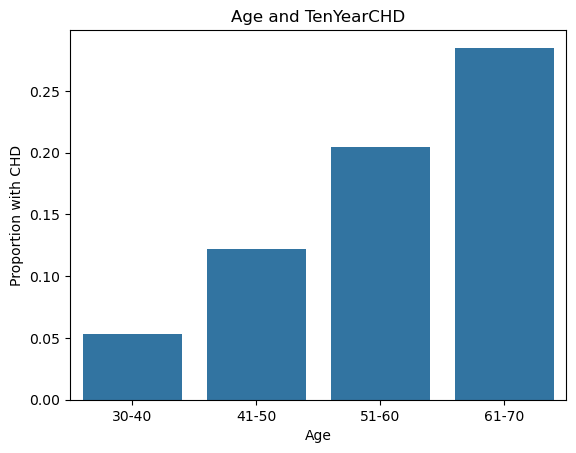

In [31]:
df_chdcomparisonbygroup = df.copy()
bins=np.linspace(min(df_chdcomparisonbygroup['age']), max(df_chdcomparisonbygroup['age']), 5)
group_names=['30-40', '41-50', '51-60', '61-70']
df_chdcomparisonbygroup.loc[:, 'age_binned'] = pd.cut(df_chdcomparisonbygroup['age'],bins=bins,labels=group_names,include_lowest=True)

Age_rate=df_chdcomparisonbygroup.groupby('age_binned')['TenYearCHD'].mean().reset_index()
Age_rate.columns=['age_binned', 'TenYearCHD_rate']

sns.barplot(data=Age_rate, x='age_binned', y='TenYearCHD_rate')
plt.title('Age and TenYearCHD')
plt.xlabel('Age')
plt.ylabel('Proportion with CHD')
plt.show()

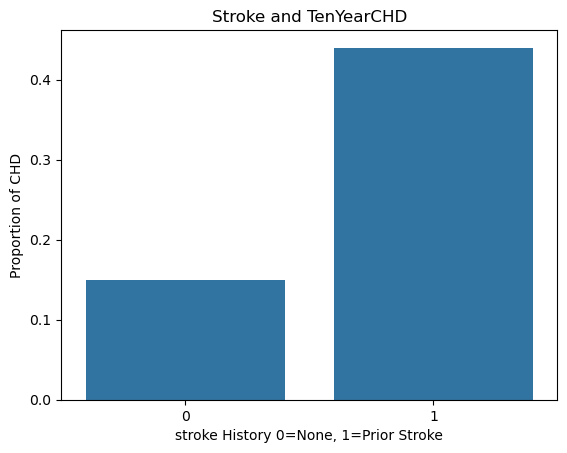

In [32]:
df_chdcomparisonbygroup = df.copy()
stroke_rate=df_chdcomparisonbygroup.groupby('prevalentStroke')['TenYearCHD'].mean().reset_index()
stroke_rate.columns=['prevalentStroke', 'TenYearCHD_rate']

sns.barplot(data=stroke_rate, x='prevalentStroke', y='TenYearCHD_rate')
plt.title('Stroke and TenYearCHD')
plt.xlabel('stroke History 0=None, 1=Prior Stroke')
plt.ylabel('Proportion of CHD')
plt.show()

In [33]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
x=df[['male', 'age', 'education','currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y=df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=27, stratify=y)

In [35]:
#Storing the cleaned dataset
df.to_csv("heartdisease_clean.csv", index=False)

In [36]:
#Reading cleaned dataset
import pandas as pd
df = pd.read_csv("heartdisease_clean.csv")


In [37]:
#Separating predictor variables from the unkown column, TenYearCHD
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [38]:
#Splitting the data into training and test sets, with 20% in the test set and 80% in the training set.
#The random state ensures the same results can be recreated.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [40]:
# Logistic Regression with GridSearchCV
params_lr = {'C': [0.01, 0.1, 1, 10]}
log_reg = LogisticRegression(max_iter=1000)

grid_lr = GridSearchCV(log_reg, params_lr, scoring='recall', cv=5)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Params:", grid_lr.best_params_)

# Predictions and Evaluation
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:,1]

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))


C:\Users\cecil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cecil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Logistic Regression Params: {'C': 1}
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.50      0.07      0.12       129

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.80      0.85      0.80       848

ROC-AUC Score: 0.698774137206068


C:\Users\cecil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
''' The best parameter found for the logistic regression model was C=1. Using that parameter resulted in the above classification results.
Of the patients the model classified as being at risk for heart disease in the next ten years, 50% of them actually were. Of all the patients
actually at risk, only 7% were classified correctly. The f1-score for positives is only .12, indiciating the results were not very accurate
when predicting patients that were at risk. However, the regression model did accurately predict 99% of patients not at risk for heart disease.
The overall ROC-AUC Score of 0.69 indicates fair performance, whith 0.5 being random and 1 being perfect. '''

In [41]:
# Decision Tree with GridSearchCV
params_dt = {'max_depth': [3, 5, 10, None],
             'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(dt, params_dt, scoring='recall', cv=5)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree Params:", grid_dt.best_params_)

# Predictions and Evaluation
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:,1]

print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_dt))


Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 2}
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       719
           1       0.19      0.19      0.19       129

    accuracy                           0.75       848
   macro avg       0.52      0.52      0.52       848
weighted avg       0.75      0.75      0.75       848

ROC-AUC Score: 0.52457655443068


In [ ]:
''' A decision tree model was tested on the dataset, with unlimited depth and a minimum sample of 2 providing the best results. 
This model produced the same results for both precision and recall, with 19% accurate positive predictions and 86% accurate negative predictions.
The recall and f1-scores for positives on this model are slightly better than the logistic regression model, but the ROC-AUC Score is lower at
0.52, indicating nearly random predictions. '''

In [42]:
# Random Forest with GridSearchCV
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf, params_rf, scoring='recall', cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

# Predictions and Evaluation
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:,1]

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Best Random Forest Params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       719
           1       0.22      0.02      0.03       129

    accuracy                           0.84       848
   macro avg       0.54      0.50      0.47       848
weighted avg       0.75      0.84      0.78       848

ROC-AUC Score: 0.6627799161195028


In [ ]:
''' Random Forect classification modeling was tested next, with unlimited depth, 100 trees and square root methods providing the strongest model.
This model had the strongest precision for positive heart disease predictions, and it was among the highest in recall for negative heart disease 
predictions. However, this model had the lowest recall for positive predictions of all three models tested so far, with only 2% of patients actually
at risk being accurately classified. This model had the seconf highest ROC-AUC Sore so far at 0.66, slightly behind the linear regression model.
'''

In [43]:
# Gradient Boosting with GridSearchCV
params_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(random_state=42)

grid_gb = GridSearchCV(gb, params_gb, scoring='recall', cv=5, n_jobs=-1)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
print("Best Gradient Boosting Params:", grid_gb.best_params_)

# Predictions and Evaluation
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:,1]

print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_gb))


Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       719
           1       0.28      0.09      0.13       129

    accuracy                           0.83       848
   macro avg       0.56      0.52      0.52       848
weighted avg       0.77      0.83      0.79       848

ROC-AUC Score: 0.6336751086241659


In [ ]:
''' The final model tested was Gradient Boosting. Having 100 boosting stages, a 0.1 learning rate, and a maximum
depth of 5 produced the strongest Results. This miodel had the highest fl-score for positive predictions at 0.13. 
It also had the second highest precision rate for positive predictions behind the linear regression model. However,
The Gradient Boosting model's ROC-AUC Score was the second lowest of the four at 0.63. '''

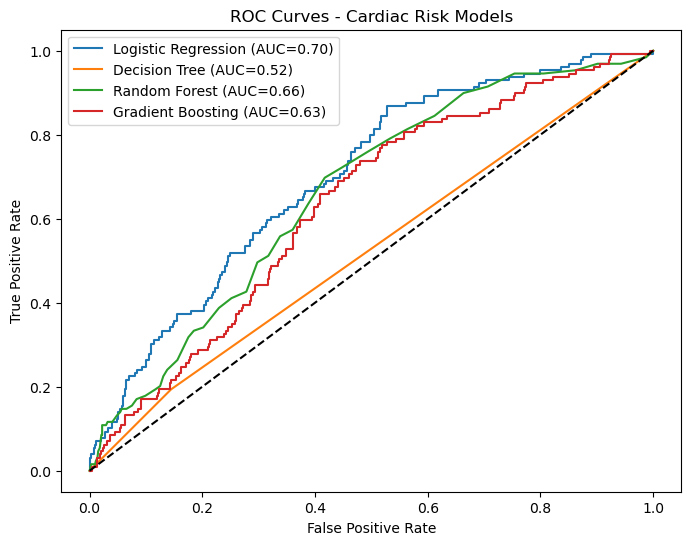

In [44]:
# Combined ROC Curve Plot for All Models
plt.figure(figsize=(8,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_score(y_test,y_proba_lr):.2f})")

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_auc_score(y_test,y_proba_dt):.2f})")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test,y_proba_rf):.2f})")

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC={roc_auc_score(y_test,y_proba_gb):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Cardiac Risk Models")
plt.legend()
plt.show()


In [ ]:
''' Looking at the ROC curve comparisons for all four models, we can see that the Logistic Regression model has the highest classification accuracy,
followed by the Random Forest model, then Gradient Boosting and Decision Tree. Linear Regression also had the highest area under the curve of all 
four models. '''

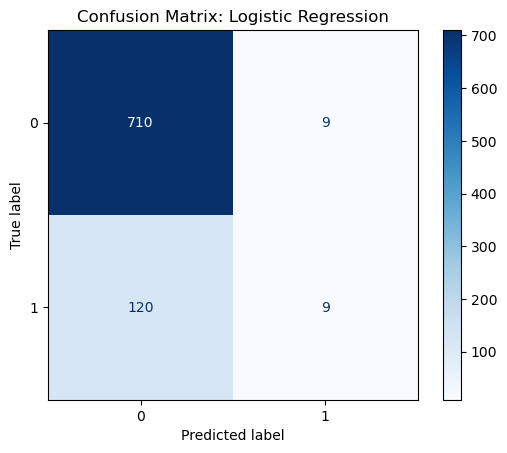

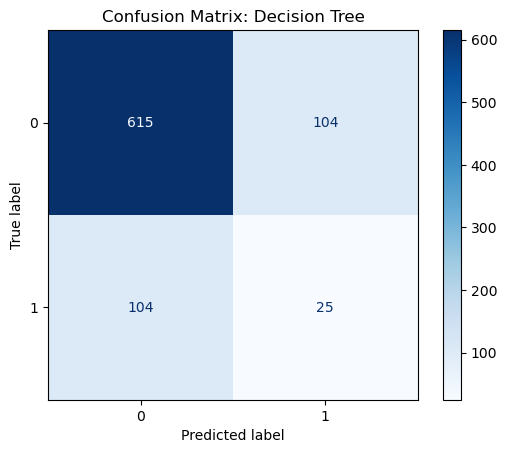

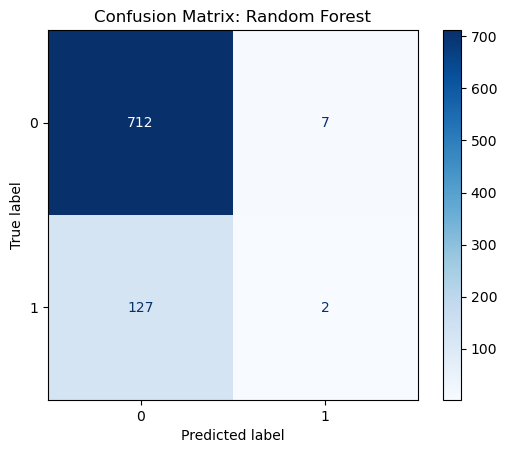

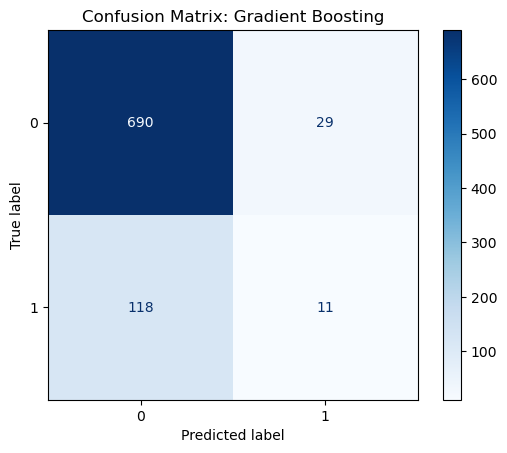

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

models_results = [
    ("Logistic Regression", best_lr, y_pred_lr),
    ("Decision Tree", best_dt, y_pred_dt),
    ("Random Forest", best_rf, y_pred_rf),
    ("Gradient Boosting", best_gb, y_pred_gb)
]

for name, model, y_pred in models_results:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[0,1], cmap="Blues")
    disp.ax_.set_title(f"Confusion Matrix: {name}")
    plt.show()


In [ ]:
''' Looking at the confusion matrices for all four models, we can see that the Decision Tree model had the highest number of true positives
at 25, but it also had thehighest number of false positives at 104. The other three models were more conservative when classifying patients as
being at risk for heart disease, with much lower false positive rates. The linear regression model had the highest number of true negatives at
710, but it also had the second lowest number of true positives at 9. '''

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

summary_data = []

for name, y_pred, y_proba in [
    ("Logistic Regression", y_pred_lr, y_proba_lr),
    ("Decision Tree", y_pred_dt, y_proba_dt),
    ("Random Forest", y_pred_rf, y_proba_rf),
    ("Gradient Boosting", y_pred_gb, y_proba_gb)
]:
    summary_data.append({
        "Model": name,
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1-Score": round(f1_score(y_test, y_pred), 3),
        "ROC-AUC": round(roc_auc_score(y_test, y_proba), 3)
    })

import pandas as pd
summary_df = pd.DataFrame(summary_data)
summary_df

,Model,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.500,0.070,0.122,0.699
1,Decision Tree,0.194,0.194,0.194,0.525
2,Random Forest,0.222,0.016,0.029,0.663
3,Gradient Boosting,0.275,0.085,0.130,0.634


In [ ]:
''' Looking at the suumarized results side by side for each model, we can see that the Linear Regression model is the strongest in both precision 
and ROC-AUC Score. The Decision Tree model had the highest recall and f1-score, but was the lowest in terms of ROC-AUC Score. ''' 

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, r2_score

combined_data = []

# Ensure predicted probabilities are defined
y_proba_lr = best_lr.predict_proba(X_test)[:,1]
y_proba_dt = best_dt.predict_proba(X_test)[:,1]
y_proba_rf = best_rf.predict_proba(X_test)[:,1]
y_proba_gb = best_gb.predict_proba(X_test)[:,1]

models = [
    ("Logistic Regression", y_pred_lr, y_proba_lr),
    ("Decision Tree", y_pred_dt, y_proba_dt),
    ("Random Forest", y_pred_rf, y_proba_rf),
    ("Gradient Boosting", y_pred_gb, y_proba_gb)
]

for name, y_pred, y_proba in models:
    combined_data.append({
        "Model": name,
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1-Score": round(f1_score(y_test, y_pred), 3),
        "ROC-AUC": round(roc_auc_score(y_test, y_proba), 3),
        "MSE": round(mean_squared_error(y_test, y_proba), 4),
        "R-squared": round(r2_score(y_test, y_proba), 4)
    })

combined_df = pd.DataFrame(combined_data)
combined_df


,Model,Precision,Recall,F1-Score,ROC-AUC,MSE,R-squared
0,Logistic Regression,0.500,0.070,0.122,0.699,0.1223,0.0521
1,Decision Tree,0.194,0.194,0.194,0.525,0.2453,-0.9017
2,Random Forest,0.222,0.016,0.029,0.663,0.1266,0.0186
3,Gradient Boosting,0.275,0.085,0.130,0.634,0.1378,-0.0682


In [ ]:
''' After adding MSE (mean square error) and R-squared (coefficient of determination) into the data summary, we
can see that the Logistic Regression model has the lowest MSE and highest R-squared, making it the strongest of the four models.
Both the Decision Tree and Gradient Boosting models resulted in negative R-squared values, indicating very poor performance.

After reviewing all four models, The Logistic Regression model is the best fit for this dataset. 